In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [7]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
# fig.tight_layout()
#
# plots = [(0,1),(2,3),(0,2),(1,3)]
# colors = ['b', 'r', 'g']
# labels = ['Iris setosa','Iris virginica','Iris versicolor']
#
# for i, ax in enumerate(axes.flat):
#     for j in range(3):
#         x = df.columns[plots[i][0]]
#         y = df.columns[plots[i][1]]
#         ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
#         ax.set(xlabel=x, ylabel=y)
#
# fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
# plt.show()

In [8]:
x = df.drop('target',axis=1)
y = df['target']

In [9]:
x = x.values
y = y.values

In [10]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [14]:
y_train = torch.LongTensor(y_train)

In [15]:
y_test = torch.LongTensor(y_test)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [18]:
epochs = 100
losses = []
for i in range(epochs):
    # forward and get a prediction
    y_pred = model(X_train)
    # calculate the loss/error
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    if i % 10 == 0:
        print(f'Epoch {i} Loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0 Loss: 1.1609848737716675
Epoch 10 Loss: 0.9522749185562134
Epoch 20 Loss: 0.790829598903656
Epoch 30 Loss: 0.6282720565795898
Epoch 40 Loss: 0.42801162600517273
Epoch 50 Loss: 0.27990370988845825
Epoch 60 Loss: 0.1643649786710739
Epoch 70 Loss: 0.10284613072872162
Epoch 80 Loss: 0.0779661163687706
Epoch 90 Loss: 0.06790287792682648


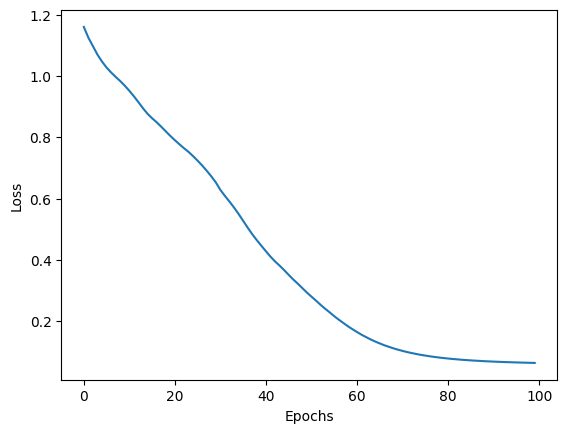

In [19]:
losses_numpy = [loss.detach().numpy() for loss in losses]
plt.plot(range(epochs), losses_numpy)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [20]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [21]:
loss

tensor(0.0890)